In [2]:
# %load linear_regression.py
#!python35
###Libraries
#Standard Library
#Third Library
import tensorflow  as tf
import numpy as np
import matplotlib.pyplot as plt


In [3]:
###线性回归
#parameters
#学习速率(*梯度)
learning_rate = 0.001
#迭代次数
training_epochs = 1000
#数据显示控制
#验证是否收敛
display_step = 500


# 训练集
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
print(train_X.shape)


(17,)


In [4]:
# tf Graph Input
#思考：多维数据是否可以？
#X = tf.placeholder("float")
#Y = tf.placeholder("float")
#矩阵:[None,]
X = tf.placeholder("float",[None,])
Y = tf.placeholder("float",[None,])

# 设置模型参数
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

# 模型：线性回归
pred = tf.add(tf.multiply(X, W), b)

# 代价函数：均方差
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#优化算法：梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

#初始化变量
init = tf.global_variables_initializer()


Epoch: 0500 cost= 0.147555619 W= 0.402304 b= -0.269375
Epoch: 1000 cost= 0.139482126 W= 0.393431 b= -0.20647
Optimization Finished!
Training cost= 0.139482 W= 0.393431 b= -0.20647 



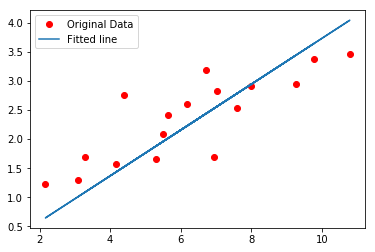

Testing ... (Mean square loss comparison)
Testing cost = 0.118878
Absolute mean suquare loss difference: 0.0


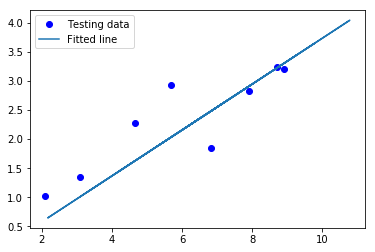

In [13]:
#运行计算图
with tf.Session() as sess:
    sess.run(init)

    #拟合训练数据
    for epoch in range(training_epochs):
        sess.run(optimizer, feed_dict= {X:train_X,Y:train_Y})

        #每一个epoch step输出一次cost

        if (epoch + 1 ) % display_step == 0:
            c = sess.run(cost, feed_dict={X:train_X,Y:train_Y})
            print("Epoch:","%04d" % (epoch+1),"cost=","{:.9f}".format(c),\
             "W=",sess.run(W),"b=",sess.run(b))
    print("Optimization Finished!")

    training_cost = sess.run(cost,feed_dict= {X:train_X,Y:train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    ###绘制图形

    plt.plot(train_X, train_Y,'ro',label = 'Original Data')
    plt.plot(train_X, sess.run(W)*train_X + sess.run(b), label = 'Fitted line')
    plt.legend()
    plt.show()
    ###Testing example, as requested
    test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])
    print("Testing ... (Mean square loss comparison)")
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict = {X:test_X, Y:test_Y})
    print('Testing cost =',testing_cost)
    print('Absolute mean suquare loss difference:', abs(testing_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

